In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


# My EDA take on the Udemy Courses Data

*I write my kaggle notebooks as I write my thought process, it's a story on how I tackled it. I try to write in a dry & humourous style, so please bear with me. Thanks buddy! :)*

Udemy has been on my radar for quite sometime, especially during my late night internet browsing sessions for courses/learning resources/ etc. Always allured by those great Udemy sales and discounts. I think I once bought a cheap course or two which I never ended up using. Maybe their formating is not for me, maybe their courses aren't too great, or maybe I'm just stuck in my analysis paraylsis which I think happens to the best of us.  Most likely their marketing skills/cheap price thought the deal was just too good to pass.

Anyways, I found this dataset so let's see what we can find here. Thank you Larxel for uploading. 

For the most part I'm going to do an EDA on the dataset, and if there is a machine learning problem I could do on this dataset I will do that towards the end, if I got time. But first let's pull up the data dictionary so I can start figuring out what kind of questions I could ask.

### Data Dictionary

| Feature| Note |
|---|---|
|course_id| ID|
|course_title|Title of the course.|
|url|Course URL|
|is_paid|Is it a paid course or not.|
|price|Price of the course|
|num_subscribers|Amount of students subscribed to the course|
|num_reviews|Number of reviews.|
|num_lectures|Lectures per course|
|level|Course diffculty|
|content_duration|Duration of all course materials in hours|
|subject|Subject of the course|

# Guiding Questions.

1. What ist the most popular course in terms of number of subscribers and number of reviews? 
2. What are the most popular subjects?
3. I wonder if there is a relationship for the length of the course and number of subscribers? 
4. I wonder if there is a relationship between price of the course to number of subscribers?


These are just some quick questions I could think about while looking at my data dictionary and the kaggle dataset preview. I think I'm just going to deep dive from here and see if I could create an interesting story. 

In [2]:
#Importing the holy trinity of data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Other Visualization packages
import seaborn as sns 

#Other Packages
import re
from wordcloud import WordCloud, STOPWORDS 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing udemy data to dataframe
df = pd.read_csv('../input/udemy-courses/udemy_courses.csv')

In [4]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   object
 4   price                3683 non-null   object
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


In [6]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Great, seems like there isn't any missing data at all! Fantastic!

# EDA - Part 1

In [7]:
#Droping Course_ID and URL, since they're irrelevant right now for my EDA
df = df.drop(columns = ['course_id','url'], axis = 1)

In [8]:
#Finding course with highest number of subscribers
df.loc[df.num_subscribers.idxmax()]

course_title           Learn HTML5 Programming From Scratch
is_paid                                               False
price                                                  Free
num_subscribers                                      268923
num_reviews                                            8629
num_lectures                                             45
level                                            All Levels
content_duration                                 10.5 hours
published_timestamp                    2013-02-14T07:03:41Z
subject                                     Web Development
Name: 2832, dtype: object

In [9]:
#Finding course with highest number of reviews
df.loc[df.num_reviews.idxmax()]

course_title           The Web Developer Bootcamp
is_paid                                      True
price                                         200
num_subscribers                            121584
num_reviews                                 27445
num_lectures                                  342
level                                  All Levels
content_duration                         43 hours
published_timestamp          2015-11-02T21:13:27Z
subject                           Web Development
Name: 3235, dtype: object

**Interesting to note:**
* The most subscribed course is a free beginners course for learning HTML5. Makes absolute sense this is the most 'popular' course. Maybe I should check it out, I'm not a web dev guy so would love to learn more on that domain. 
* Most reviewed  course is a paid Web Dev Bootcamp. Makes sense, as someone who has paid for a course most likley would review it too. 

**New Question:**
* Do paid courses get more reviews than free courses? 

In [10]:
df.groupby(['is_paid']).mean()

,num_subscribers,num_reviews,num_lectures
is_paid,,,
FALSE,6624.673913,148.456522,20.326087
False,12389.356061,474.276515,21.606061
TRUE,854.817035,39.266562,39.621451
True,2791.700877,152.593864,42.279401
https://www.udemy.com/learnguitartoworship/,30.000000,1463.000000,29.000000


# OMG THE DATA IS MESSED UP! I NEED TO CLEAN THIS! 

Why would someone do this, smh! **(insert cry emoji)** (How does one actually insert emojis? Can someone please comment below?)

In [11]:
df.is_paid.value_counts()

True                                           2738
TRUE                                            634
False                                           264
FALSE                                            46
https://www.udemy.com/learnguitartoworship/       1
Name: is_paid, dtype: int64

In [12]:
#Standardize True
df['is_paid'] = df['is_paid'].replace('TRUE', 'True')
#Standardize False
df['is_paid'] = df['is_paid'].replace('FALSE', 'False')

#Believe it our not but learning guitar to worship is a paid course 
#and currenlty 75% off.
df['is_paid'] = df['is_paid'].replace('https://www.udemy.com/learnguitartoworship/',
                                      'True')

In [13]:
df.is_paid.value_counts()

True     3373
False     310
Name: is_paid, dtype: int64

In [14]:
#Now I can run this code in peace 
df.groupby(['is_paid']).mean()

,num_subscribers,num_reviews,num_lectures
is_paid,,,
False,11533.951613,425.929032,21.416129
True,2426.819152,131.680996,41.775867


I AM SHOCKED! My hypothesis is wrong, there are more reviews on the free courses on average than paid courses! **Interesting to note: Paid courses have more lectures though.**

# EDA - Part 1 continued....

What ae the more popular subjects? I'm guessing tech and business will be the top two. 

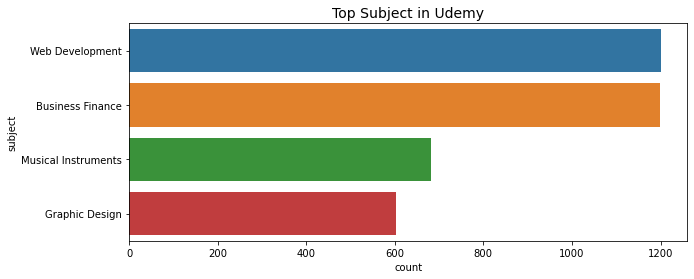

In [15]:
plt.figure(figsize = (10,4))
sns.countplot(y = df.subject, data = df, order = df.subject.value_counts().index)
plt.title("Top Subject in Udemy", fontsize = 14)
plt.show()

Well that is dissapointing, I guess this dataset is limited to just four subjects. But I guess my hypothesis is kinda true Web Development is tech, and Business Finance goes under business. **The question is, where are the data science courses? After all, I found this dataset on kaggle. **

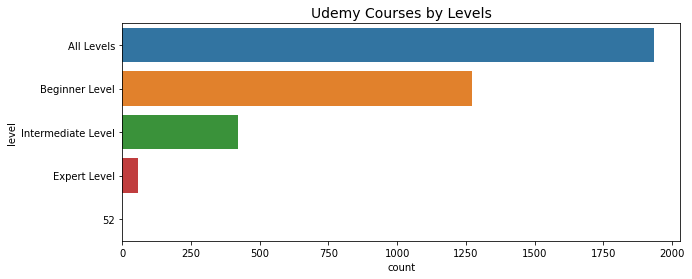

In [16]:
plt.figure(figsize = (10,4))
sns.countplot(y = df.level, data = df, order = df.level.value_counts().index)
plt.title("Udemy Courses by Levels", fontsize = 14)
plt.show()

I wonder what the difference between all levels and beginner levels, does all level teaches you something that goes from beginner to expert? 

# EDA - How does price effect the buyer? 

Price plays an important role when we're shopping for products, it's true for educational courses too. You want the best bang for your buck, you want value. Let's see what we could gain from looking closer into price.
1. Build a boxplot on price
2. Does price differ frome different subjects? 
2. Relationship between price and num_subscribers 
3. Relatoinship between price and num_reviews

However, I don't want to encounter a problem like last time, so let us clean up the price column before we do any analyzing. 

**Cleaning Steps:**
1. Covert 'Free' to 0
2. Covert or delete 'TRUE'
3. Covert column to integer

In [17]:
# df.price.value_counts()

#Step 1: Converting Free
df.price = df.price.replace('Free', 0)

#Step 2: Delete the 1 row where price is = TRUE
that_one_element = df[df.price == 'TRUE'].index
df.drop(that_one_element, inplace = True, axis = 0)

#Step 3: Convert column to integer
df.price = pd.to_numeric(df['price'])

<Figure size 432x288 with 0 Axes>

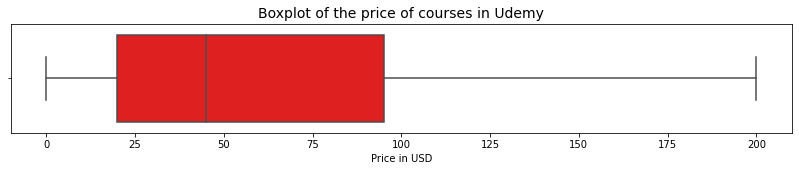

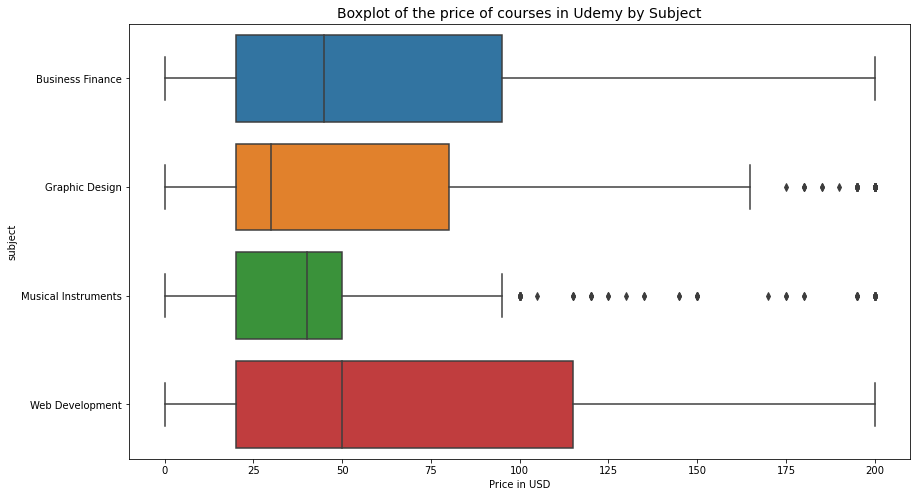

In [18]:
plt.figure()
plt.subplots(figsize = (14,2))
sns.boxplot(x = df.price, data = df, color = 'red')
plt.title('Boxplot of the price of courses in Udemy',fontsize = 14)
plt.xlabel('Price in USD') #I am assuming all prices are in USD

plt.subplots(figsize = (14,8))
sns.boxplot(x = df.price, y = df.subject, data = df)
plt.title('Boxplot of the price of courses in Udemy by Subject',fontsize = 14)
plt.xlabel('Price in USD') #I am assuming all prices are in USD
plt.show()

**Interesting to Note:** 
* Seems as if the average price of a course is just under $50 USD
* Graphic Design courses has the lowest average prices
* Web Development courses has the largest interquartile range in price.
* Music courses have the lowest interquatile range in price. 

Now what about the relationships price have with the other features? 

                    price  num_subscribers  num_reviews  num_lectures
price            1.000000         0.050939     0.113778      0.330495
num_subscribers  0.050939         1.000000     0.649957      0.157929
num_reviews      0.113778         0.649957     1.000000      0.243083
num_lectures     0.330495         0.157929     0.243083      1.000000


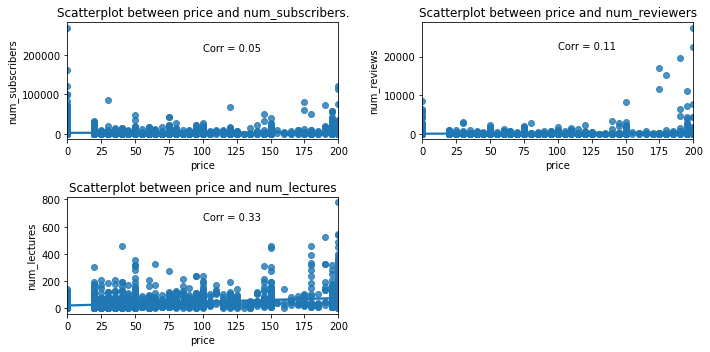

In [19]:
print(df.corr())

%matplotlib inline
plt.figure(figsize = (10,5))

plt.subplot(221)
sns.regplot(x=df.price, y=df.num_subscribers, data = df)
plt.title('Scatterplot between price and num_subscribers.')
plt.text(100, 210000,'Corr = 0.05')

plt.subplot(222)
sns.regplot(x=df.price, y=df.num_reviews,data = df)
plt.title('Scatterplot between price and num_reviewers')
plt.text(100, 22000,'Corr = 0.11')

plt.subplot(223)
sns.regplot(x=df.price, y=df.num_lectures,data = df)
plt.title('Scatterplot between price and num_lectures')
plt.text(100, 650,'Corr = 0.33')

plt.tight_layout()
plt.show()

This is kind of dissapointing, I was hoping of at least a strong correlation on one of them. They are all weak. However, I could check if there is a relationship between price and the duration of the content. 

Let me do that, but first I need to clean up the content_duration feature.

In [20]:
df.content_duration.head()

0    1.5 hours
1     39 hours
2    2.5 hours
3      3 hours
4      2 hours
Name: content_duration, dtype: object

In [21]:
#Removing character values, leaving the numbers and decimal point
decimal_num_only = re.compile(r'[^\d.]+')
for i in np.arange(0,len(df.content_duration)+1):
    if i == 2066: #Because I removed row 2066, include this so there is no error
        continue     
    df.content_duration[i] = decimal_num_only.sub('', df.content_duration[i])

#Converting the feature to numeric    
df.content_duration = pd.to_numeric(df.content_duration)    

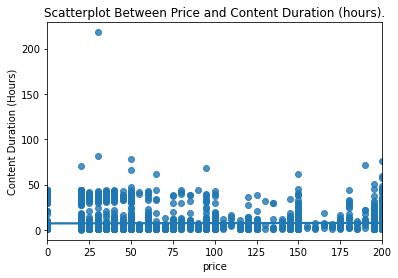

In [22]:
plt.figure()
sns.regplot(x=df.price, y=df.content_duration,data = df)
plt.title('Scatterplot Between Price and Content Duration (hours).')
plt.ylabel('Content Duration (Hours)')
plt.show()

How upsetting, no strong correlation either. Even from these scatterplots, we can tell that there is probably no proper distribution of the price of the courses. Let's check though :/ 

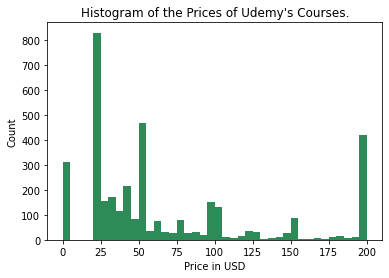

In [23]:
plt.figure()
plt.hist(x= df.price, bins = 40, color = 'seagreen')
plt.title('Histogram of the Prices of Udemy\'s Courses.')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.show()

## I was wrong! There seems to be a right skewed distribution! Which makes absolute sense. I'd be more inclined to buy a cheaper course than more expensive one. To be honest, my boxplot of prices pretty much fortold this. It's pretty late in the evening, so I must be tired for making a useless graph. 

In [24]:
#Extracting year from date time. 
df['year'] = pd.to_datetime(df.published_timestamp).dt.year

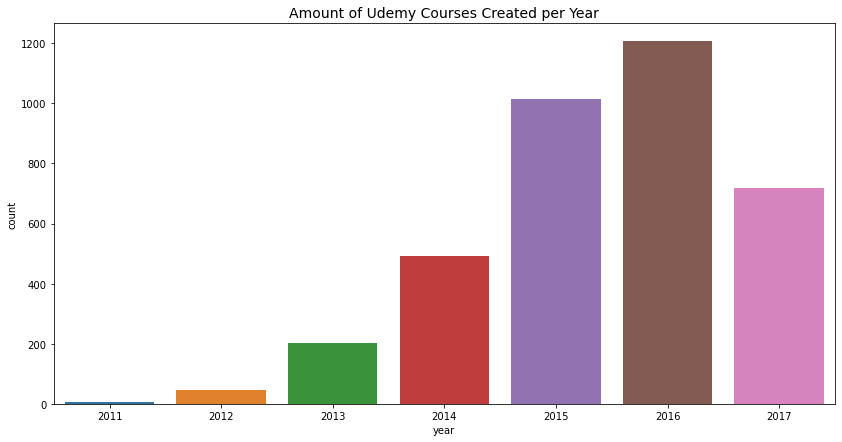

In [25]:
plt.figure(figsize = (14,7))
sns.countplot(x = df.year, data = df)
plt.title("Amount of Udemy Courses Created per Year", fontsize = 14)
plt.show()

* It seems more and more courses are being released each year, however why is there a dip in 2017. Maybe this dataset was created in the middle of 2017. I wonder if there is a full Udemy course dataset outthere, that is more up to date. 

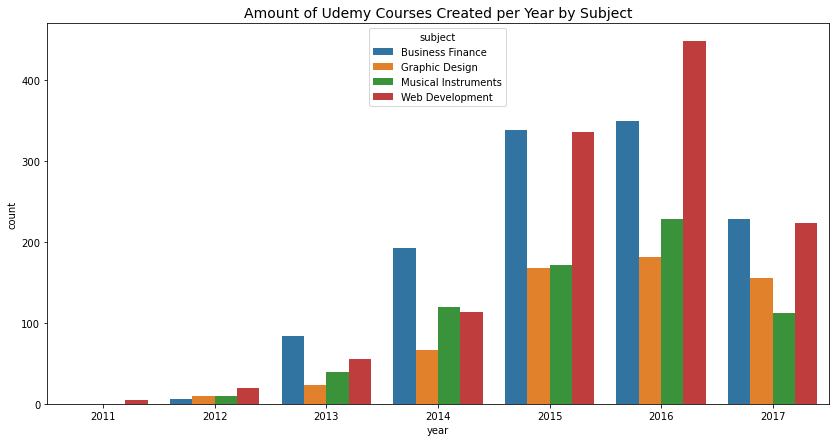

In [26]:
plt.figure(figsize = (14,7))
sns.countplot(x = df.year, data = df, hue = df.subject)
plt.title("Amount of Udemy Courses Created per Year by Subject", fontsize = 14)
plt.show()

* This is cool, even though business courses have generally been popular. In recent years it seems as if more and more tech courses are being released. 


# EDA - Fun Quick Wordclouds

In [27]:
%%time
wordcloud_word_list = ''
stopwords = set(STOPWORDS)

wordcloud =WordCloud(height = 1000, width = 1000).generate(str(df.course_title).lower())

CPU times: user 2.35 s, sys: 82.1 ms, total: 2.43 s
Wall time: 2.43 s


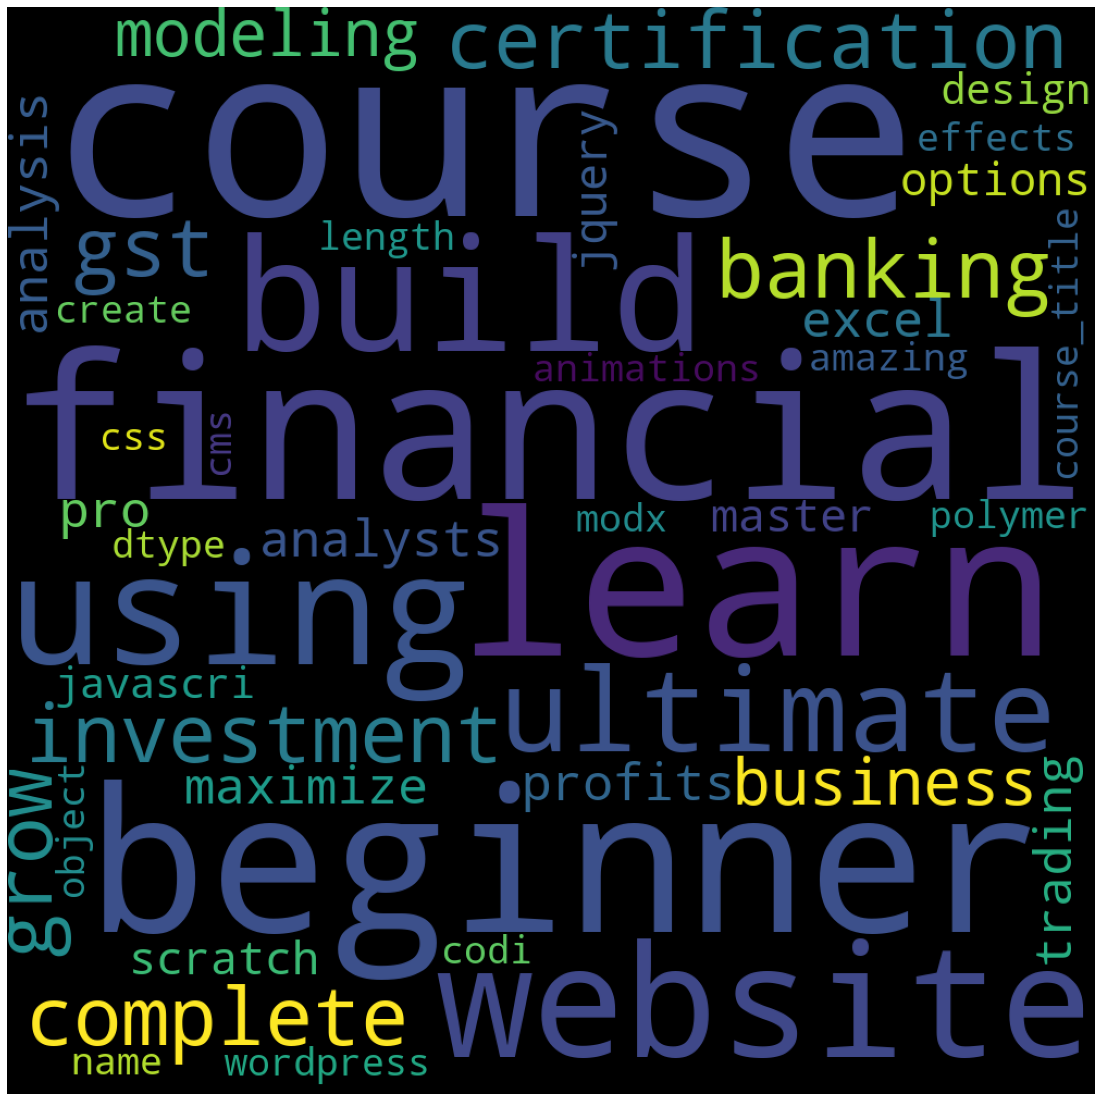

In [28]:
#Plotting the wordcloud
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Interesting to Note**

From our quick word cloud, thers some interesting things to see here. 
* Few Investment, trading, & financial types of courses out there on udemy. Wonder if they're are any good ones. 
* Few website related courses out there I guess.
* Not suprised to see 'beginner' in there.

To be honest, this isn't the best wordcloud, I did not clean my text data. For next time, I would do that, and do a wordcloud for each of the subjects to see what stands out. However, I did hope from this word cloud I could at least see 'data'. 

There is much more I could do, but I will save that for next time.

As for a potential machine learning problem, I could see if I could predict the number of subscribers based on the data I have. I think I could do something with the course_title column and do some feature engineering with it. In addition, I could also feature engineer the datetime column to garner more interesting insights as well. 